<font size="8"><b>Определяющие факторы успеха игры</b></font>

Цель : Необходимо проанализировать ситуацию на рынке игр и понять факторы, которые определяют успешность игры!

Нам доступна база данных с информацией до 2017 года, включающая в себя :

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (от 0 до 100)
    User_Score — оценка пользователей (от 0 до 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг             компьютерных игр и присваивает им подходящую возрастную категорию. 

# 1. Откроем файл и изучим общую информацию

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/datasets/games.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы имеем 16715 строк. Сразу видно, что у столбца User_Score неправильный тип данных, также тип данных Year_of_Release лучше заменить на int. Также видно, что в некоторых столбцах есть пустые значения.

# 2. Подготовка данных

In [2]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [3]:
df = df.rename(columns = {
    "Name": "name",
    "Platform":"platform",
    "Year_of_Release": "year_of_release",
    "Genre": "genre",
    "NA_sales": "na_sales",
    "EU_sales": "eu_sales",
    "JP_sales": "jp_sales",
    "Other_sales": "other_sales",
    "Critic_Score": "critic_score",
    "User_Score": "user_score",
    "Rating": "rating",
    }
              )
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Я заменил названия столбцов и узнал о количестве пропусков.
Точно знать название игры и год ее выпуска нам важно и вставлять тут среднее значение года или просто занулять строчку считаю будет неправильно. Поэтому я решил удалить строчки с отсутствующим годом выпуска, а имена  изменить на unknown


In [4]:
df['name'] = df['name'].fillna('unknown')

df['genre'] = df['genre'].fillna('unknown')

df.dropna(subset = ['year_of_release'], inplace = True)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Теперь нужно разобраться с колонками critic_score, user_score, rating

In [5]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Тут я заменил год релиза на int и присвоил пропущенным значениям столбца ctitic_score NaN среднее значения критиков. Оно равно 69 баллов.

In [6]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.7       2
0.2       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Обработав значения столбца с оценками пользователей, мы видим, что существует значение tbd = to be determined. Т.е. зрители еще не поставили оценки этим играм. Я оставил незаполенные поля, т.к. данных для их заполнения недостаточно. выбрасывать было бы нехорошо( 

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df['rating'] = df['rating'].fillna('unknown') 

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16446 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Вывод : Во втором блоке я заменил названия столбцов, проверил и заменил все пропуски : в столбцах name, genre, rating у неизвестных значений я поставил unknown, а в столбцах critic_score and user_score я выставил средние значения оценок. 

# 3.Добавление столбца суммарных продаж по всем регионам.

In [8]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


# 4. Исследовательский анализ данных.

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               62
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


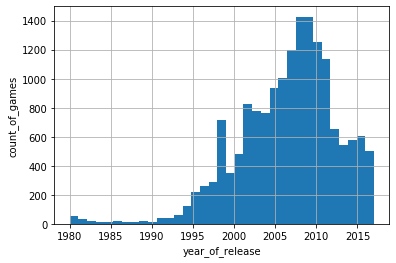

In [9]:
game_per_year = df.pivot_table(index = 'year_of_release', values = 'name' , aggfunc = 'count')
print(game_per_year)

df['year_of_release'].hist(bins = 35, range=(1980,2017))
plt.ylabel('count_of_games')
plt.xlabel('year_of_release')
plt.show()

До 1991 года игр выло выпущено совсем мало и они вряд ли могут рассказать что-то дельное про современные тенденции, поэтому я решил принимать в расчет игры, выпущеные после 1990 года. 

Text(0.5, 0, 'year_of_release')

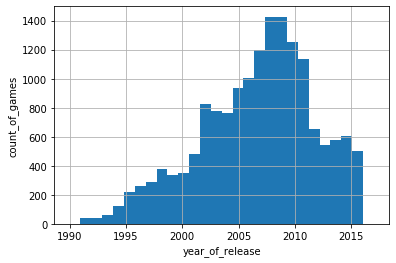

In [10]:
interesting_df = df.query('year_of_release > 1990')
interesting_df['year_of_release'].hist(bins=28 , range=(1990,2017))
plt.ylabel('count_of_games')
plt.xlabel('year_of_release')

Проанализируем платформы теперь.

In [11]:
print('Количество платформ:',len(df['platform'].unique()))
df['platform'].value_counts().head(17)

Количество платформ: 31


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
Name: platform, dtype: int64

Я выбрал 17 самых популярных платформ, тк на остальных было выпущено меньше 200 игр.

In [12]:
box = ['PS2','DS','PS3','Wii','X360','PSP','PS','PC','GBA','XB','GC','3DS','PSV','PS4','N64','XOne','SNES']
good_platform = df.query('platform in @box')

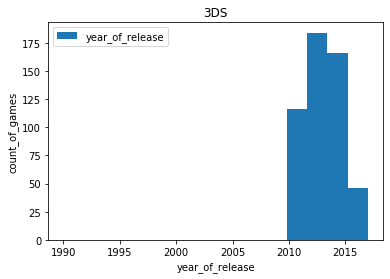

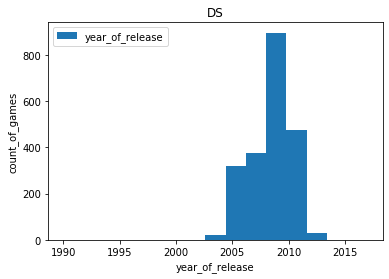

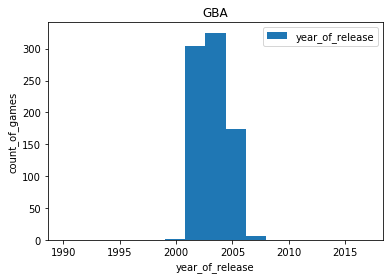

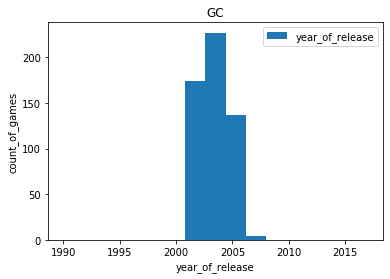

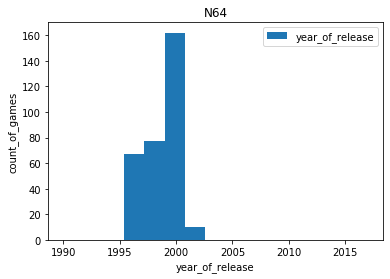

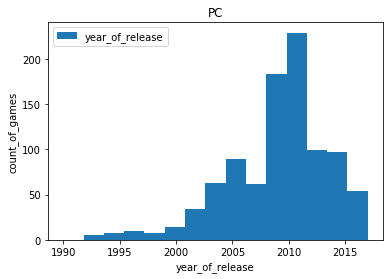

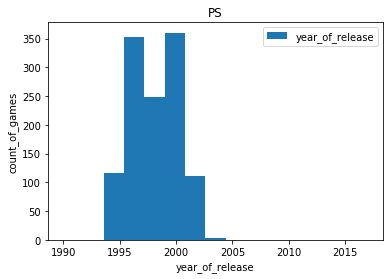

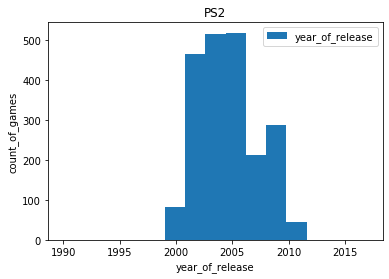

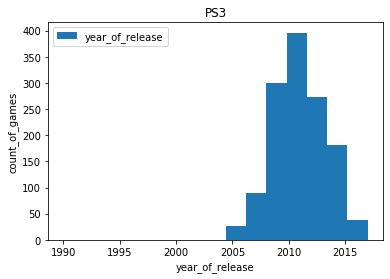

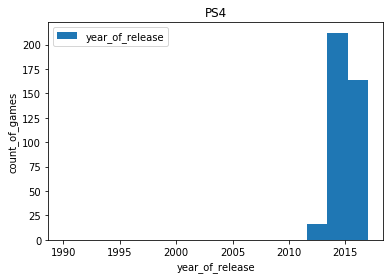

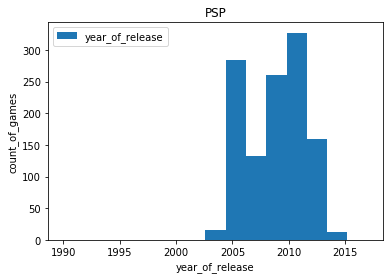

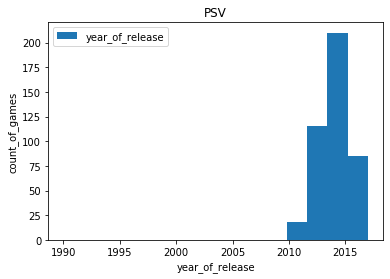

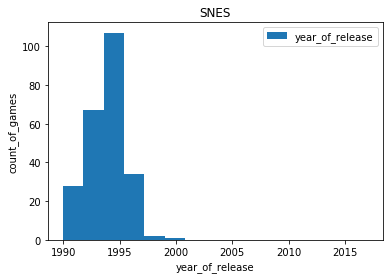

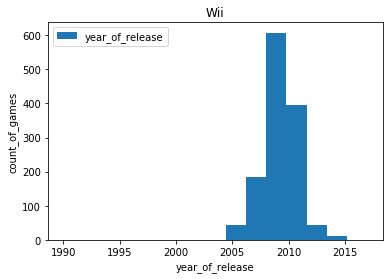

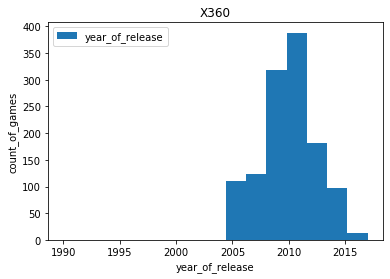

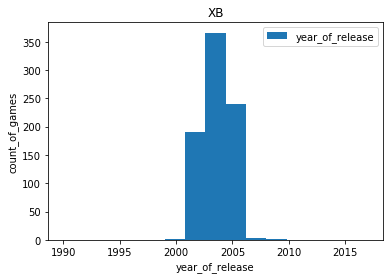

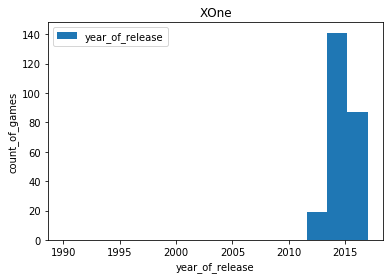

In [13]:
for name, group_data in good_platform.groupby('platform'):
    group_data.plot(
        kind='hist',
        y = 'year_of_release',
        title = name,
        bins = 15,
        range = (1990,2017)
    )
    plt.ylabel('count_of_games')
    plt.xlabel('year_of_release')

ВЫВОД: По данным гистограммам видно, что в будущем выпускать игры будут только для платформ 3DS, PC, PS4, , PSV, XOne. 
На платформы PS3,PSP, X360 если и выйдет, то совсем немного игр.
В прошлом популярными платформами были: 
DS (c 2002 по 2012),
GBA ( c 1998 по 2008),
GC в начала 2000ых,
N64 в конце 90-ых,
PS и следующее поколение PS2 (хочется отметить, что в ближайшем будущем ту же учесть ждет поколения PSP and PS3),
SNES в 90-ые,
Wii в середине 2000ых,
X360 тоже скоро совсем перестанет быть релевантным, но в ближайший 2017 год еще можно немного игр ждать для этой платформы,
XB в начале 2000ых.

В среднем новые платформы появляются в промежутке 6-10 лет, поэтому дальше возьмем данные об играх, вышедших позже 2008 года.

# Оставим только те данные, для которых будем проводить последующий анализ.

In [14]:
box_for_platfrom = ['3DS','PC','PS4','PSV','XOne','PS3','PSP','X360']
appropriate_data = df.query('year_of_release > 2009 and platform in @box_for_platfrom')
appropriate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 14 to 16714
Data columns (total 12 columns):
name               4128 non-null object
platform           4128 non-null object
year_of_release    4128 non-null int64
genre              4128 non-null object
na_sales           4128 non-null float64
eu_sales           4128 non-null float64
jp_sales           4128 non-null float64
other_sales        4128 non-null float64
critic_score       2020 non-null float64
user_score         2220 non-null float64
rating             4128 non-null object
sum_sales          4128 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 419.2+ KB


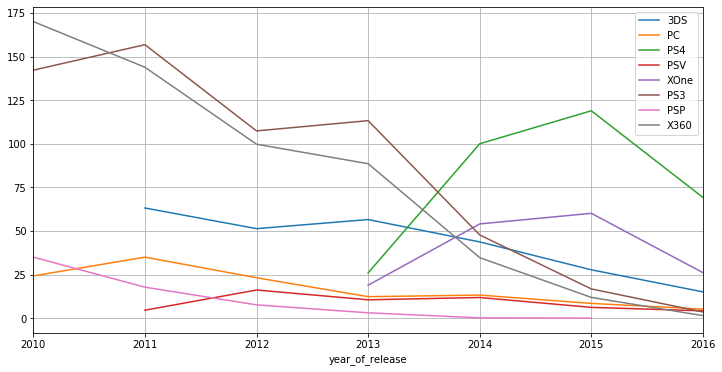

In [15]:
%matplotlib inline
platforms = ['PC','PS4','PSV','XOne','PS3','PSP','X360']
first_plot = appropriate_data.query('platform == "3DS"')
ax = first_plot.pivot_table(index ='year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
    y='sum_sales',     
    grid=True,
    label = '3DS',
    figsize=(12, 6)
) 
for plat in platforms:
    plot_for_platform = appropriate_data.query('platform == @plat')
    plot_for_platform.pivot_table(index ='year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
    y='sum_sales',
    ax=ax,
    grid=True,
    label = plat,
    figsize=(12, 6),
) 
    

ВЫВОД : для платформ XOne, PSV, PS4, PC прибыль либо растет,либо достаточно стабильная. В то же время 3DS,PS3, PSP, X360 перестают приность прибыль.
Снижающийся тренд роста в 2016 можно объяснить не полными данными за год.Т.е вполне возможно, что данные собраны до июля 2016,например, поэтому даже для XOne and PS4 прибыль меньше, чем в 2015.

Самыми потенциально прибыльными платформами являются XOne and PS4.

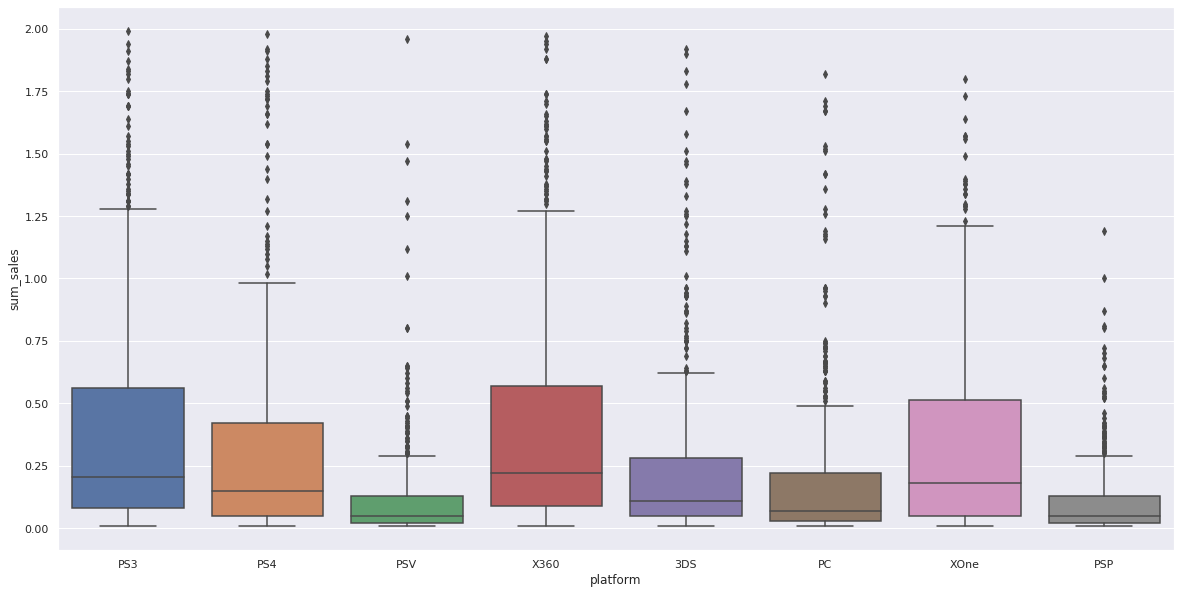

In [16]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.boxplot(x='platform', y='sum_sales',data = appropriate_data.query('sum_sales < 2'))

Я отбросил выбросы для удобства анализа графика. Медиана для всех платформ расположена до 0.25 миллионов долларов, а вот разброс значений разный. Самыми прибыльными платформами являются PS3, PS4, X360, XOne.

# Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.

я для исследования возьму платформу PS4

отзывы покупателей и критиков  и продажи. Диаграмму рассеивания и корреляция.

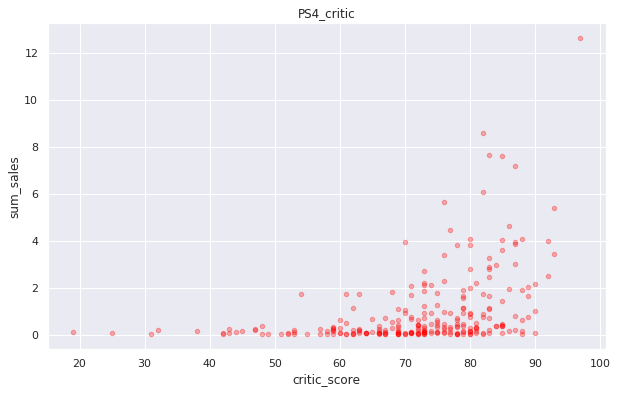

Корреляция между отзывами критиков и продажами: 0.40656790206178095


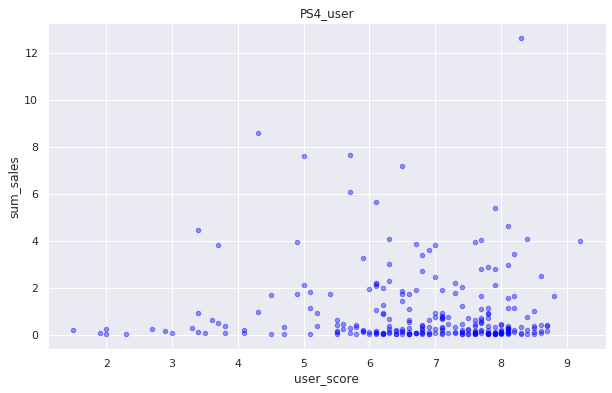

Корреляция между отзывами пользователей и продажами: -0.031957110204556424


In [17]:
analize_PS4 = appropriate_data.query('platform == "PS4"')
analize_PS4.plot(x='critic_score', y='sum_sales', kind='scatter',title='PS4_critic', alpha=0.3, figsize=(10,6), color ='red') 
plt.show()
print('Корреляция между отзывами критиков и продажами:',analize_PS4['critic_score'].corr(analize_PS4['sum_sales']))
analize_PS4.plot(x='user_score', y='sum_sales', kind='scatter',title='PS4_user', alpha=0.4, figsize=(10,6), color ='blue') 
plt.show()
print('Корреляция между отзывами пользователей и продажами:',analize_PS4['user_score'].corr(analize_PS4['sum_sales']))

<font size="4"><b> Проверим две другие популярные консоли.</b></font>

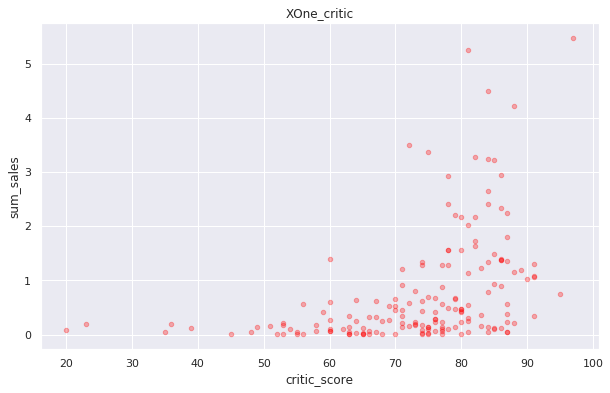

Корреляция между отзывами критиков и продажами: 0.4169983280084017


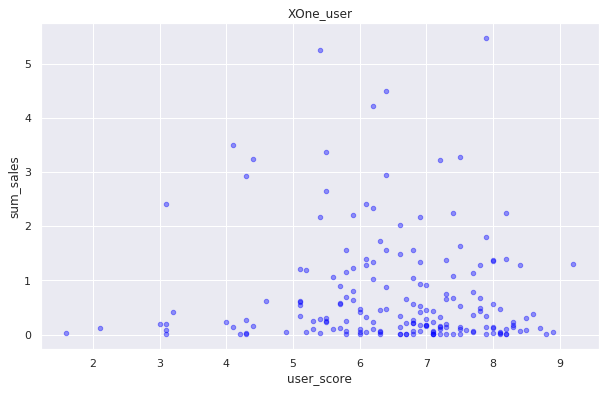

Корреляция между отзывами пользователей и продажами: -0.06892505328279414


In [18]:
analize_XOne = appropriate_data.query('platform == "XOne"')
analize_XOne.plot(x='critic_score', y='sum_sales', kind='scatter',title='XOne_critic', alpha=0.3, figsize=(10,6), color ='red') 
plt.show()
print('Корреляция между отзывами критиков и продажами:',analize_XOne['critic_score'].corr(analize_XOne['sum_sales']))
analize_XOne.plot(x='user_score', y='sum_sales', kind='scatter',title='XOne_user', alpha=0.4, figsize=(10,6), color ='blue') 
plt.show()
print('Корреляция между отзывами пользователей и продажами:',analize_XOne['user_score'].corr(analize_XOne['sum_sales']))

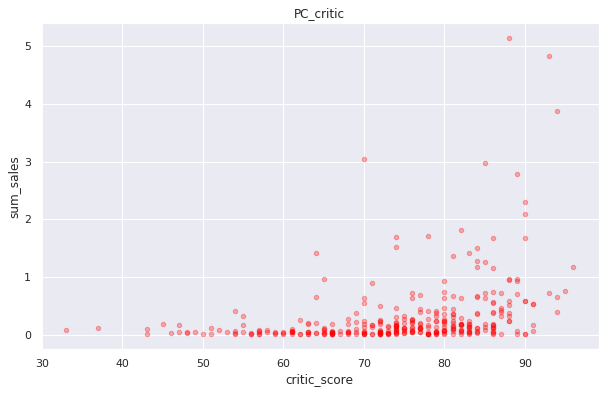

Корреляция между отзывами критиков и продажами: 0.3364970713018004


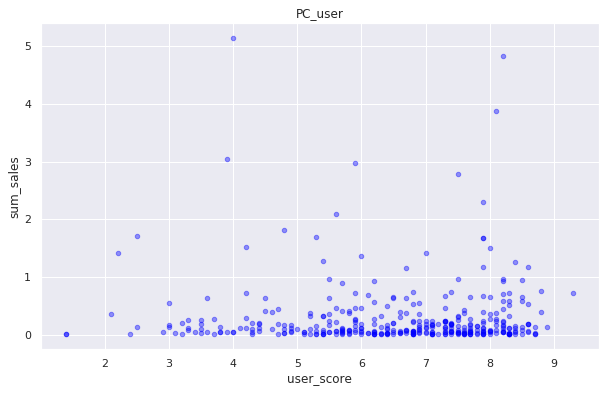

Корреляция между отзывами пользователей и продажами: -0.01108714966282253


In [19]:
analize_PC = appropriate_data.query('platform == "PC"')
analize_PC.plot(x='critic_score', y='sum_sales', kind='scatter',title='PC_critic', alpha=0.3, figsize=(10,6), color ='red') 
plt.show()
print('Корреляция между отзывами критиков и продажами:',analize_PC['critic_score'].corr(analize_PC['sum_sales']))
analize_PC.plot(x='user_score', y='sum_sales', kind='scatter',title='PC_user', alpha=0.4, figsize=(10,6), color ='blue') 
plt.show()
print('Корреляция между отзывами пользователей и продажами:',analize_PC['user_score'].corr(analize_PC['sum_sales']))

ВЫВОД: Между отзывами users и продажами совсем нет корреляции, а вот критикам удается относительно предсказать успех продаж.
можно заметить, что если оценка критиков игре > 60, то и суммарные продажи вероятнее окажутся больше. 
Мое предположение такое : пользовательский рейтинг совсем не играет роли в успехе продаж, а критики чаще предсказывают прибыльную игру, но связь все равно относильно слабая (около 0.35 ). Вероятнее всего схожая корреляция будет со всеми платформами.


In [20]:
print('Количество жанров:',len(df['genre'].unique()))
appropriate_data['genre'].value_counts()

Количество жанров: 13


Action          1238
Role-Playing     510
Adventure        465
Sports           431
Shooter          373
Misc             314
Racing           198
Fighting         177
Simulation       145
Strategy         140
Platform          96
Puzzle            41
Name: genre, dtype: int64

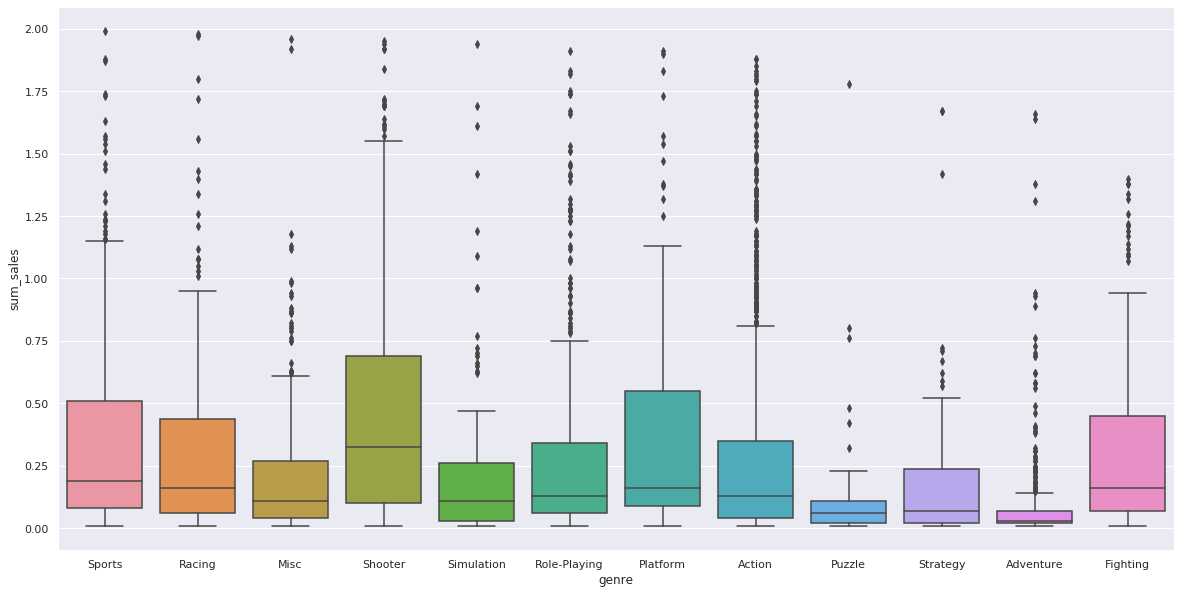

In [21]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.boxplot(x='genre', y='sum_sales',data = appropriate_data.query('sum_sales < 2'))

ВЫВОД: Самыми прибыльными жанрами являются шутер, спортивные игры, драки и платформенные игры. А самыми неприбыльными являются пазлы и приключения, а жаль. Я бы покупал с бОльшим удовольствием их:)

# 5. Портрет пользователя каждого региона.

# Северная Америка

In [22]:
most_popular_NA_platform = appropriate_data.pivot_table(
    index='platform', 
    values='na_sales',
    aggfunc='sum').sort_values(by='na_sales',ascending=False) / appropriate_data['na_sales'].sum()
display(most_popular_NA_platform.head())

most_popular_NA_genre = appropriate_data.pivot_table(
    index='genre', 
    values='na_sales',
    aggfunc='sum').sort_values(by='na_sales',ascending=False) / appropriate_data['na_sales'].sum()
display(most_popular_NA_genre.head())

most_popular_NA_rating = appropriate_data.pivot_table(
    index='rating', 
    values='na_sales',
    aggfunc='sum').sort_values(by='na_sales',ascending=False) / appropriate_data['na_sales'].sum()
display(most_popular_NA_rating.head())

,na_sales
platform,
X360,0.367582
PS3,0.252164
PS4,0.119609
XOne,0.102428
3DS,0.090911


,na_sales
genre,
Action,0.268663
Shooter,0.254133
Sports,0.143555
Role-Playing,0.107795
Misc,0.068571


,na_sales
rating,
M,0.416079
E,0.202578
T,0.154708
unknown,0.127320
E10+,0.099216


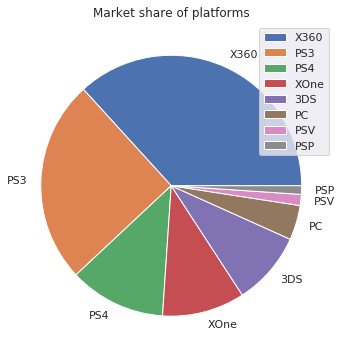

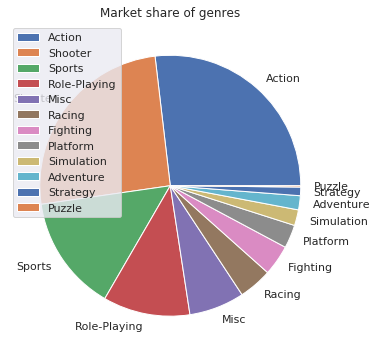

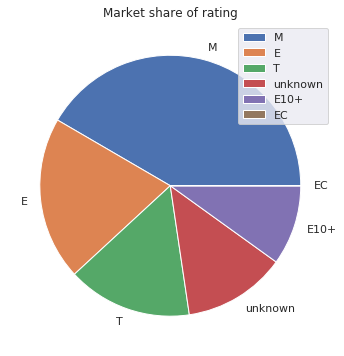

In [23]:
most_popular_NA_platform.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of platforms")
plt.ylabel("")
plt.show()

most_popular_NA_genre.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of genres")
plt.ylabel("")
plt.show()

most_popular_NA_rating.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of rating")
plt.ylabel("")
plt.show()

ВЫВОД: большой процент от общих продаж для X360 и PS3 объясняется тем, что консоли прожили весь свой цикл, в то время как PS4
или XOne только в начале своего пути.
В Северной Америке людят экш игры и шутеры с рейтингом для взрослых :) 

# Европа

In [24]:
most_popular_EU_platform = appropriate_data.pivot_table(
    index='platform', 
    values='eu_sales',
    aggfunc='sum').sort_values(by='eu_sales',ascending=False) / appropriate_data['eu_sales'].sum()
display(most_popular_EU_platform.head())

most_popular_EU_genre = appropriate_data.pivot_table(
    index='genre', 
    values='eu_sales',
    aggfunc='sum').sort_values(by='eu_sales',ascending=False) / appropriate_data['eu_sales'].sum()
display(most_popular_EU_genre.head())

most_popular_EU_rating = appropriate_data.pivot_table(
    index='rating', 
    values='eu_sales',
    aggfunc='sum').sort_values(by='eu_sales',ascending=False) / appropriate_data['eu_sales'].sum()
display(most_popular_EU_rating.head())



,eu_sales
platform,
PS3,0.296485
X360,0.226820
PS4,0.195839
PC,0.095525
3DS,0.085045


,eu_sales
genre,
Action,0.287019
Shooter,0.233954
Sports,0.143190
Role-Playing,0.095261
Racing,0.068722


,eu_sales
rating,
M,0.401782
E,0.211801
unknown,0.156807
T,0.145161
E10+,0.084407


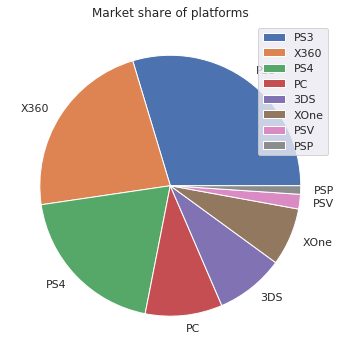

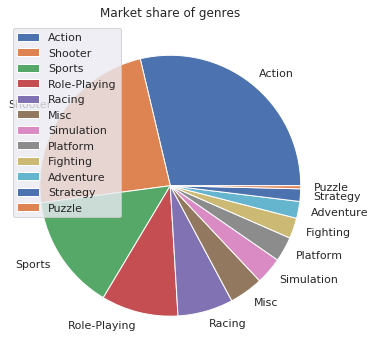

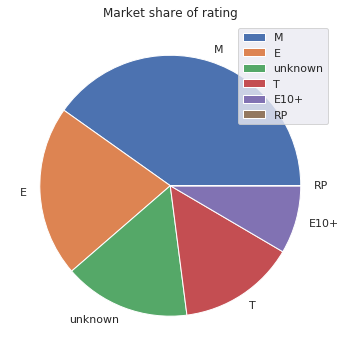

In [25]:
most_popular_EU_platform.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of platforms")
plt.ylabel("")
plt.show()

most_popular_EU_genre.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of genres")
plt.ylabel("")
plt.show()

most_popular_EU_rating.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of rating")
plt.ylabel("")
plt.show()

ВЫВОД:В Европе не так сильно любят платформу XBox :) А вот предпочтения по играм схожие. 

# Япония

In [26]:
most_popular_JP_platform = appropriate_data.pivot_table(
    index='platform', 
    values='jp_sales',
    aggfunc='sum').sort_values(by='jp_sales',ascending=False) / appropriate_data['jp_sales'].sum()
display(most_popular_JP_platform.head())

most_popular_JP_genre = appropriate_data.pivot_table(
    index='genre', 
    values='jp_sales',
    aggfunc='sum').sort_values(by='jp_sales',ascending=False) / appropriate_data['jp_sales'].sum()
display(most_popular_JP_genre.head())

most_popular_JP_rating = appropriate_data.pivot_table(
    index='rating', 
    values='jp_sales',
    aggfunc='sum').sort_values(by='jp_sales',ascending=False) / appropriate_data['jp_sales'].sum()
display(most_popular_JP_rating.head())


,jp_sales
platform,
3DS,0.409557
PS3,0.241208
PSP,0.171768
PSV,0.088896
PS4,0.064963


,jp_sales
genre,
Role-Playing,0.338896
Action,0.271736
Adventure,0.056089
Misc,0.055112
Sports,0.050838


,jp_sales
rating,
unknown,0.567568
T,0.157237
M,0.122558
E,0.122395
E10+,0.030243


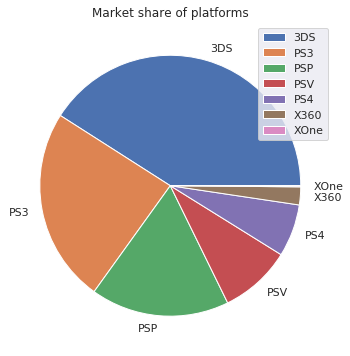

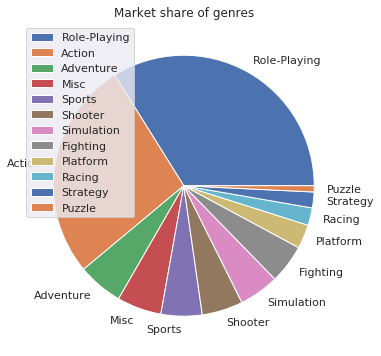

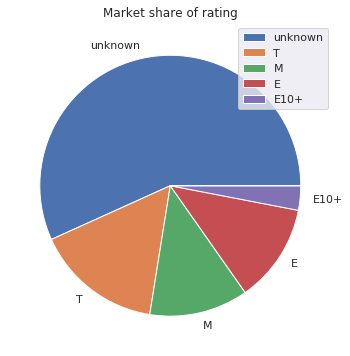

In [27]:
most_popular_JP_platform.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of platforms")
plt.ylabel("")
plt.show()

most_popular_JP_genre.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of genres")
plt.ylabel("")
plt.show()

most_popular_JP_rating.plot(kind='pie', subplots=True, figsize=(6, 6))
plt.title("Market share of rating")
plt.ylabel("")
plt.show()

А вот в Японии больше любят переносные консоли и ролевые игры, а рейтинг присуждать почему-то не торопятся.

# 6. Исследование статистических показателей

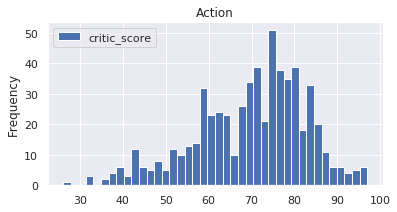

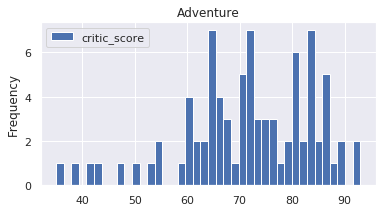

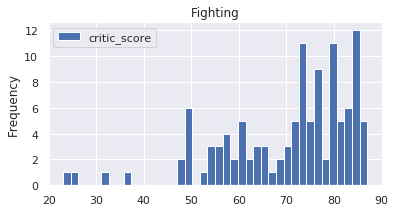

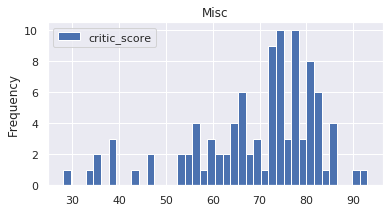

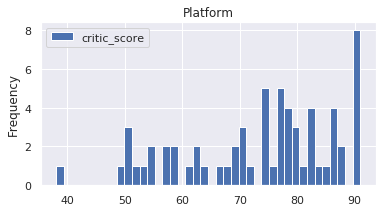

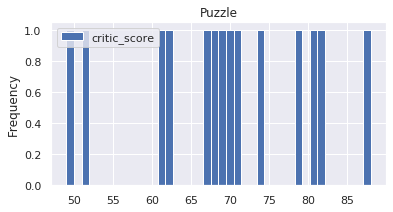

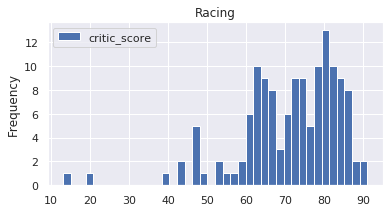

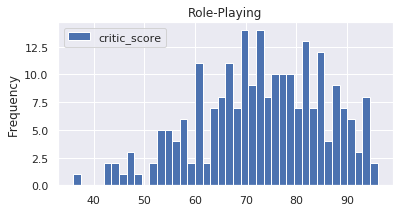

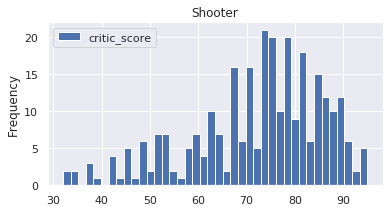

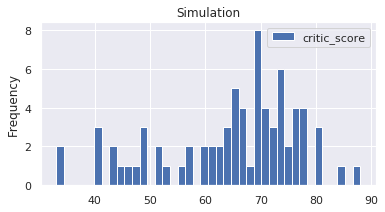

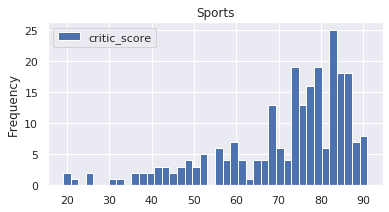

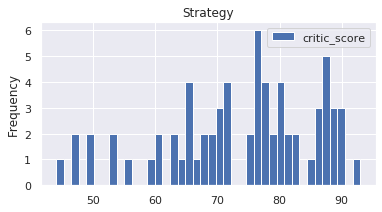

In [28]:
for name, group_data in appropriate_data.groupby('genre'):
    group_data.plot(
        kind='hist',
        y = 'critic_score',
        title = name,
        bins = 40,
        figsize=(6,3)
    )

In [35]:
print('Название жанра   | Среднее          | Дисперсия      | Станд. отклонение')
print('-----------------------------------------------------------------------')
for name, num in appropriate_data.groupby('genre'):
    print('{: <16} | {: >16.2f} | {: >14.2f} | {: >12.2f}'.format(name,
                                                      num['critic_score'].mean(), 
                                                      num['critic_score'].var(),
                                                      num['critic_score'].std()
                                                                  )
          )
    

Название жанра   | Среднее          | Дисперсия      | Станд. отклонение
-----------------------------------------------------------------------
Action           |            69.68 |         169.73 |        13.03
Adventure        |            71.45 |         154.71 |        12.44
Fighting         |            70.23 |         183.23 |        13.54
Misc             |            69.08 |         186.67 |        13.66
Platform         |            73.50 |         174.06 |        13.19
Puzzle           |            69.43 |         126.42 |        11.24
Racing           |            71.18 |         173.57 |        13.17
Role-Playing     |            72.88 |         154.02 |        12.41
Shooter          |            72.06 |         190.53 |        13.80
Simulation       |            64.58 |         155.40 |        12.47
Sports           |            71.39 |         242.59 |        15.58
Strategy         |            73.63 |         150.62 |        12.27


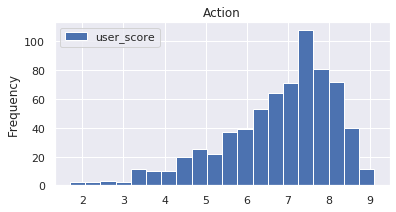

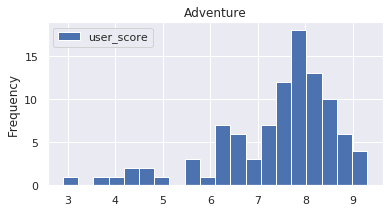

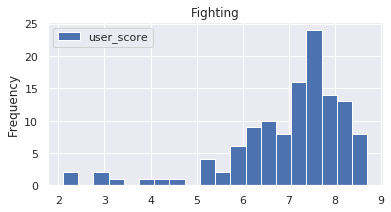

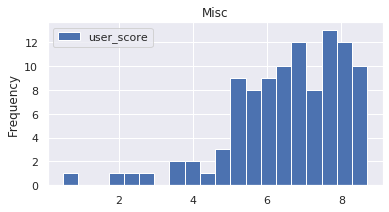

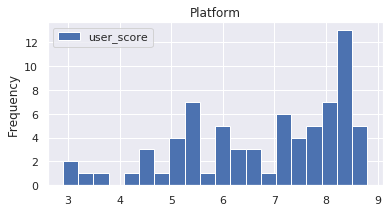

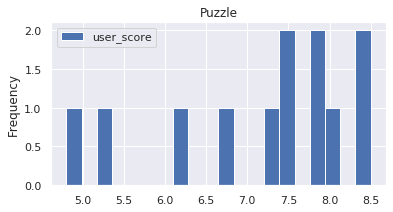

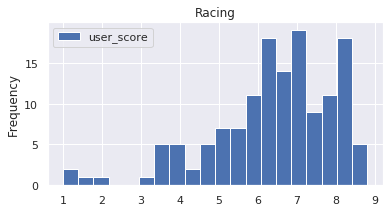

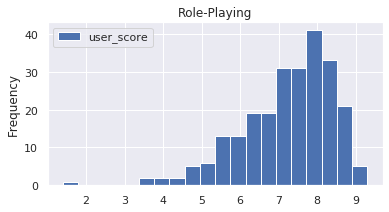

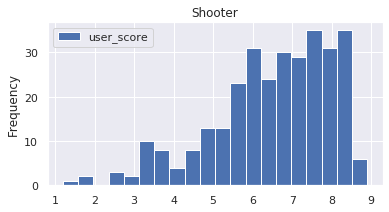

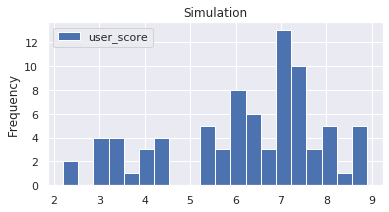

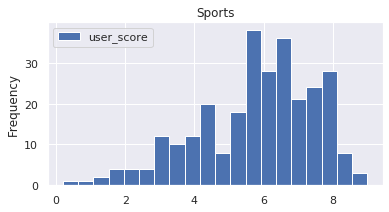

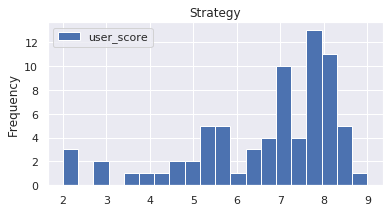

In [36]:
for name, group_data in appropriate_data.groupby('genre'):
    group_data.plot(
        kind='hist',
        y = 'user_score',
        title = name,
        bins = 20,
        figsize=(6,3)
    )

In [37]:
print('Название жанра   | Среднее          | Дисперсия      | Станд. отклонение')
print('-----------------------------------------------------------------------')
for name, num in appropriate_data.groupby('genre'):
    print('{: <16} | {: >16.2f} | {: >14.2f} | {: >12.2f}'.format(name,
                                                      num['user_score'].mean(), 
                                                      num['user_score'].var(),
                                                      num['user_score'].std()
                                                                  )
          )
    

Название жанра   | Среднее          | Дисперсия      | Станд. отклонение
-----------------------------------------------------------------------
Action           |             6.78 |           1.83 |         1.35
Adventure        |             7.37 |           1.65 |         1.28
Fighting         |             6.99 |           1.70 |         1.30
Misc             |             6.54 |           2.39 |         1.55
Platform         |             6.80 |           2.52 |         1.59
Puzzle           |             7.17 |           1.42 |         1.19
Racing           |             6.40 |           2.49 |         1.58
Role-Playing     |             7.23 |           1.50 |         1.22
Shooter          |             6.49 |           2.30 |         1.52
Simulation       |             6.21 |           2.90 |         1.70
Sports           |             5.81 |           2.88 |         1.70
Strategy         |             6.64 |           2.84 |         1.69


ВЫВОД : Мы нулевым значениям присвоили среднее из-за чего данные вероятно исказились. Теоретически, распределения должны получиться нормальными, без настолько ярко выраженым средним :( 

# 7. Проверка Гипотез.

Сформулируем нулевую гипотезу H0 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и альтернативную гипотезу H1 : Средние пользовательские рейтинги платформ Xbox One и PC различаются. 

In [38]:
analize_XOne = appropriate_data.query('platform == "XOne"')
analize_PC = appropriate_data.query('platform == "PC"')

alpha = 0.05

results = st.ttest_ind(analize_XOne['user_score'], analize_PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


ВЫВОД : мы не можем отвергнуть теорию о том, что пользовательские рейтинги у PC и XOne одинаковые! 

Сформулируем нулевую гипотезу H0 : Средние пользовательские рейтинги жанров Action и Sports одинаковые, и альтернативную гипотезу H1 : Средние пользовательские рейтинги жанров Action и Sports разные.

In [39]:
analize_Action = appropriate_data.query('genre == "Action"')
analize_Sports = appropriate_data.query('genre == "Sports"')

alpha = 0.05

results = st.ttest_ind(analize_Action['user_score'], analize_Sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


ВЫВОД: Мы отвергаем гипотезу о том, что рейтинги у этих жанров одинаковые и принимаем альтернативную гипотезу : рейтинги отличаются! 

Для проверки гипотез я пользовался значением p-value, т.к. по нему удобно проверять, соответсвует ли нулевая гипотеза определенному уровню значимости Альфа.

# 8. Общий вывод.

Итак, самыми потенциально прибыльными платформами оказались PS4 и XOne в мире, но в Японии больше любят портативные платформы, поэтому для реклами на этом рынке стоит уделить время и платформе 3DS. По успеху платформ старого поколения PS3 и X360 становится понятно, что у современных флагманов большое будущее. 

В целом в мире больше покупают игры для взрослых рейтинга M, игры для подростков рейтинга T и игры для всех рейтинга E.
Самыми популярными жанрами являются Action, shooter and sport, если говорить про Северную Америку и Европу. Для Японии важно сделать акцент еще на ролевых играх.